# 3D image analysis

In [2]:
import numpy as np
import skimage
import matplotlib.pyplot as plt

In [5]:
image_series= skimage.io.imread('data/cell_series.tif')
image_series.shape

TiffPage 0: TypeError: read_bytes() missing 3 required positional arguments: 'dtype', 'count', and 'offsetsize'


(30, 256, 256)

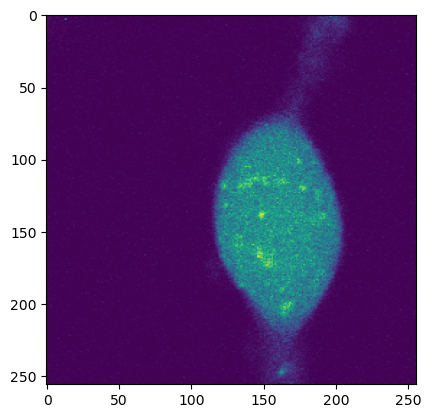

In [6]:
plt.imshow(image_series[0,:,:])
plt.show()

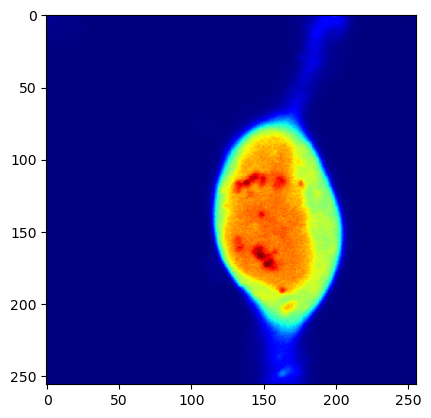

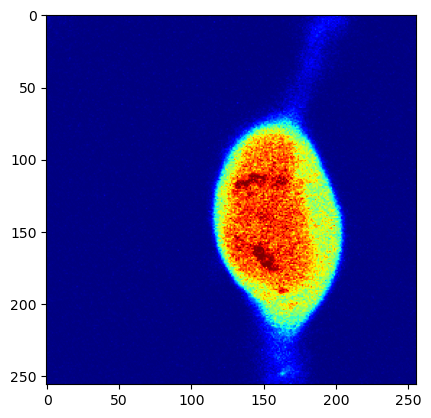

In [7]:
ctrl_img= np.mean(image_series, axis=0)

plt.imshow(ctrl_img,cmap ='jet')
plt.show()

plt.imshow(image_series[15,:,:],cmap ='jet')
plt.show()

In [8]:
ctrl_img_blure=skimage.filters.gaussian(ctrl_img, sigma=1.5)

th_multi=skimage.filters.threshold_multiotsu(ctrl_img_blure)

ctrl_img_segmentation= np.digitize(ctrl_img_blure, bins = th_multi)

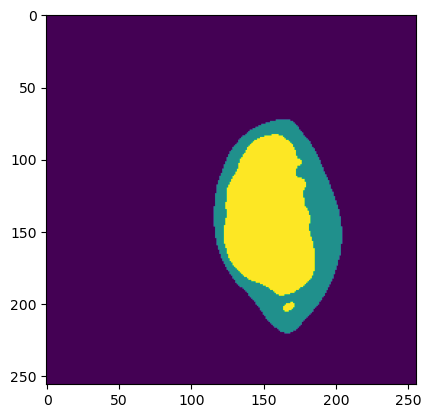

In [9]:
plt.imshow(ctrl_img_segmentation)

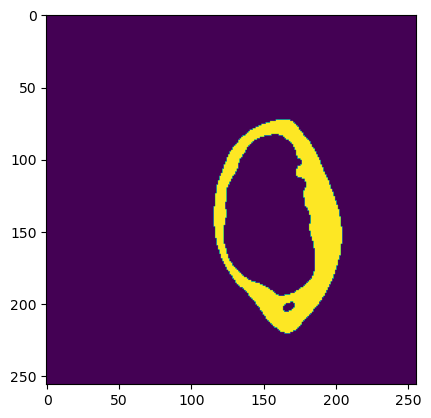

In [10]:
cytoplasm_mask= ctrl_img_segmentation==1
plt.imshow(cytoplasm_mask)

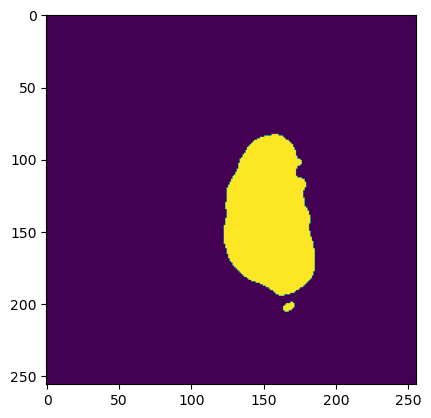

In [11]:
nucleus_mask= ctrl_img_segmentation==2
plt.imshow(nucleus_mask)

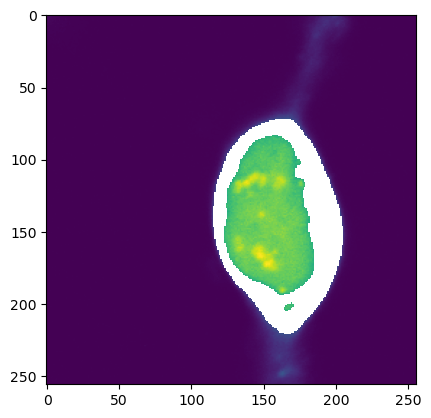

In [12]:
from numpy import ma

masked_cytoplasm = ma.masked_where(cytoplasm_mask, ctrl_img)

plt.imshow(masked_cytoplasm)

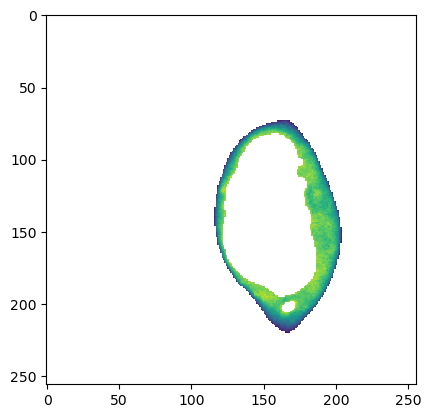

In [13]:
from numpy import ma

masked_cytoplasm = ma.masked_where(~cytoplasm_mask, ctrl_img)

plt.imshow(masked_cytoplasm)

In [14]:
np.mean(masked_cytoplasm)

1832.189725297253

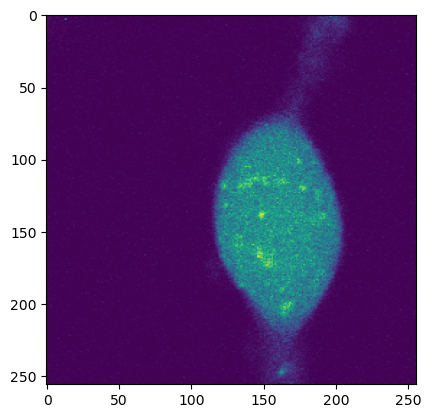

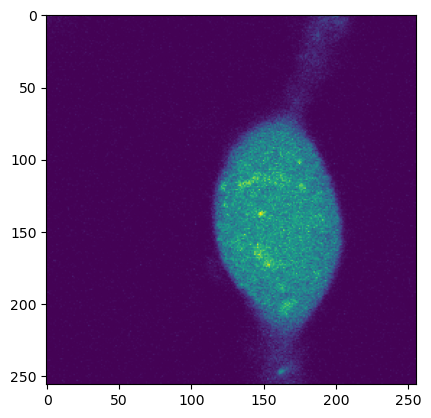

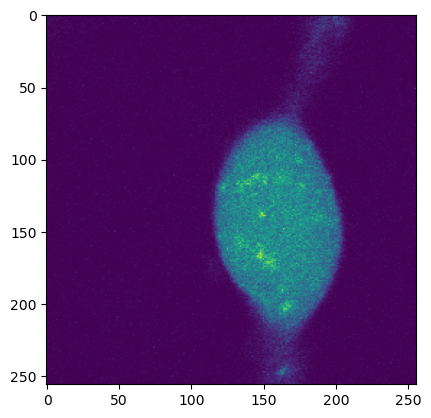

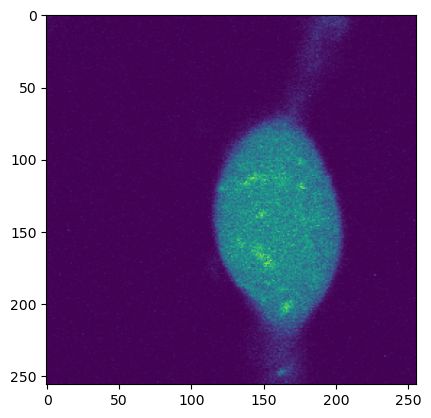

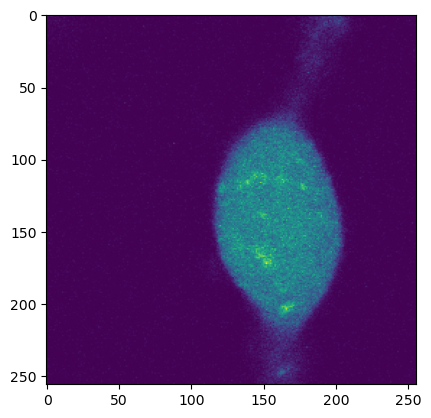

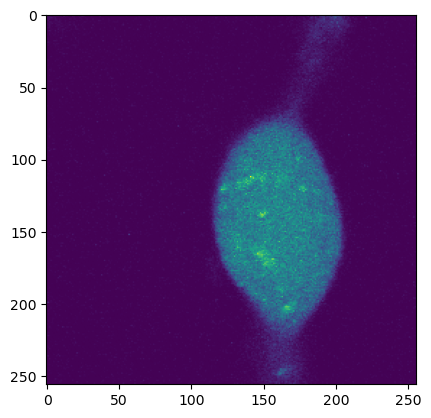

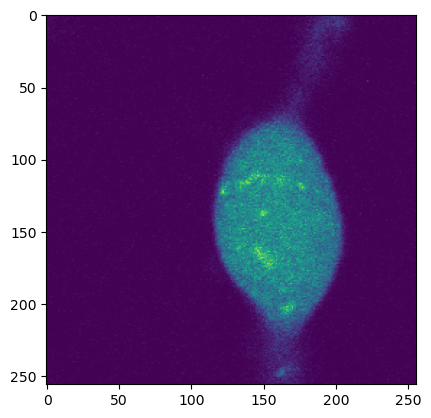

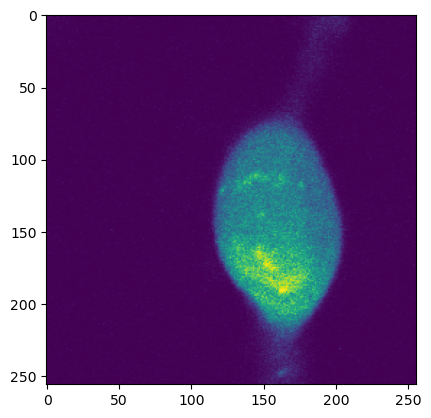

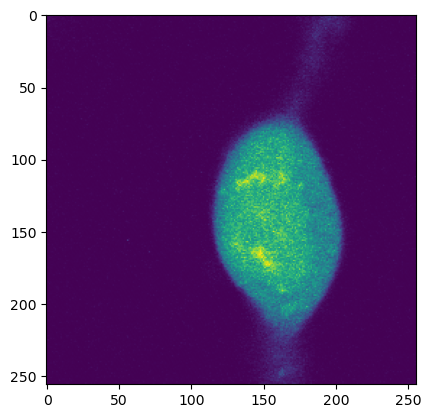

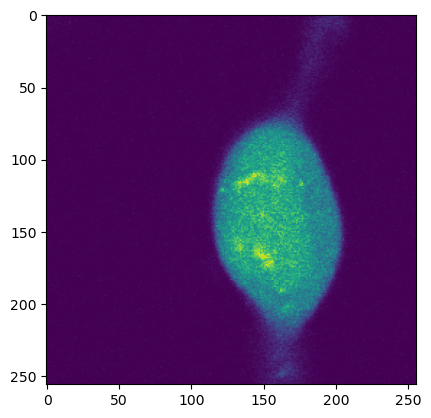

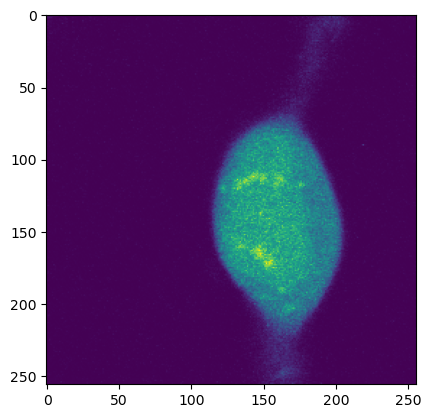

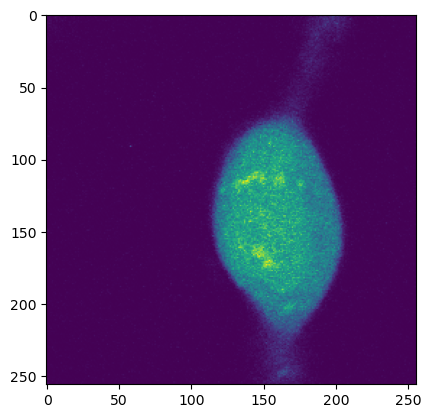

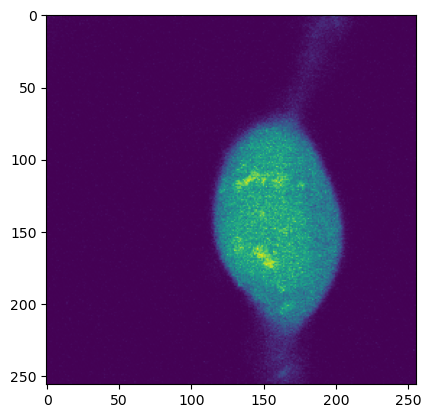

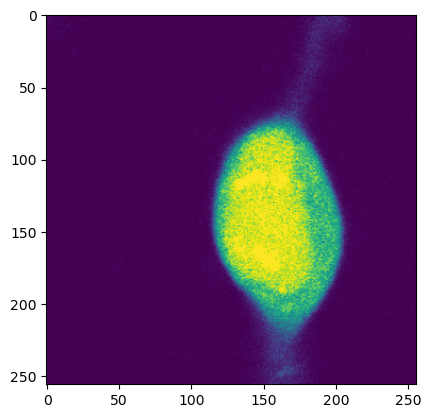

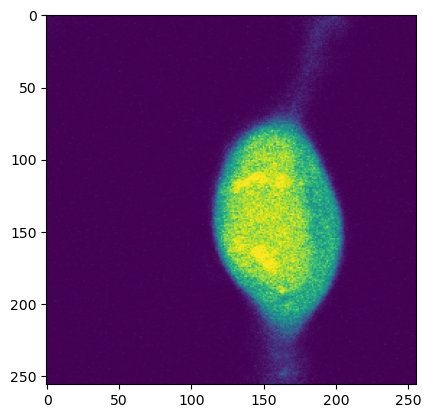

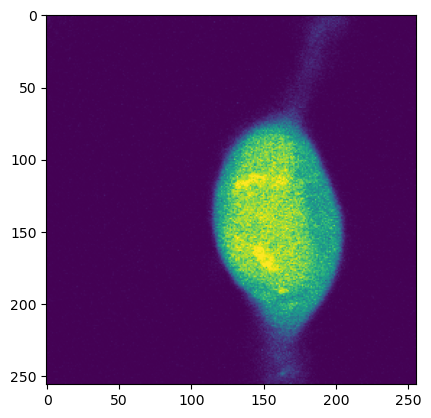

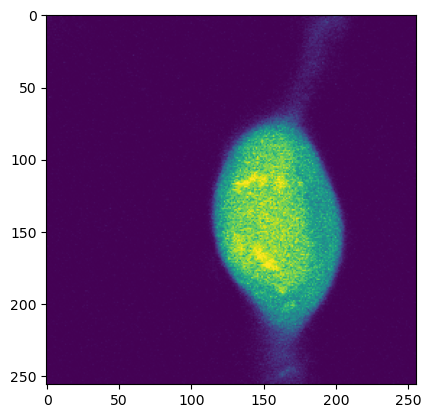

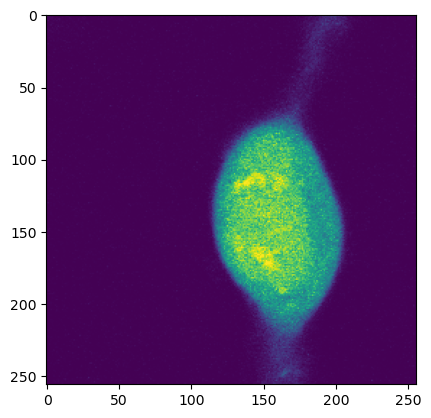

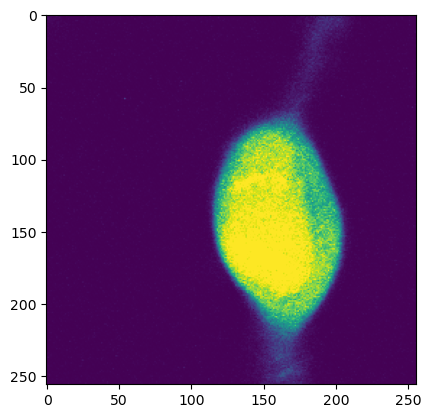

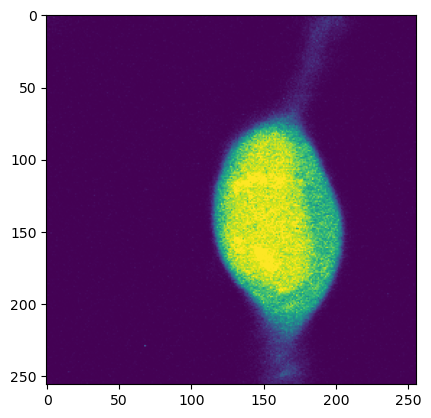

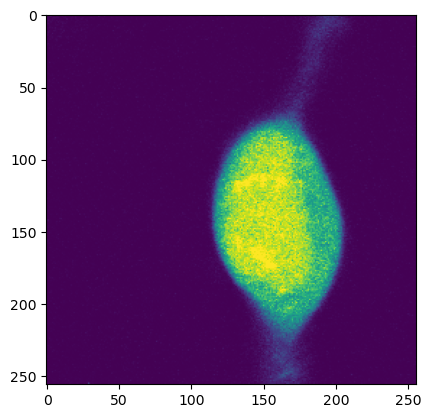

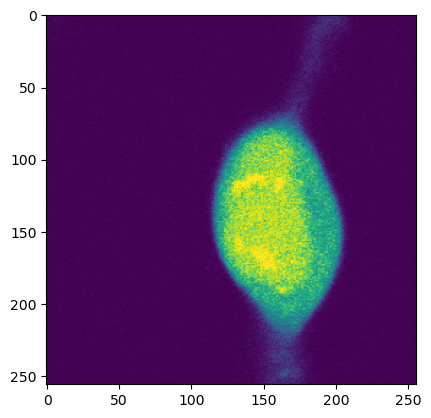

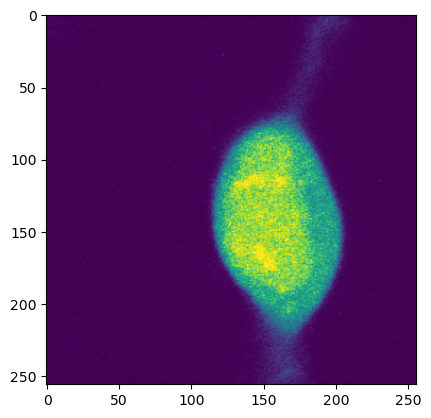

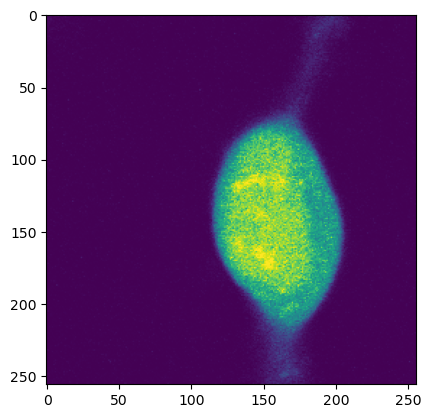

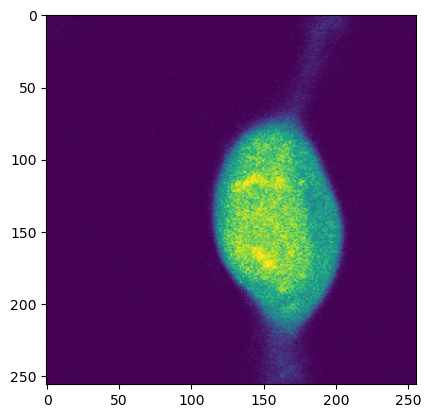

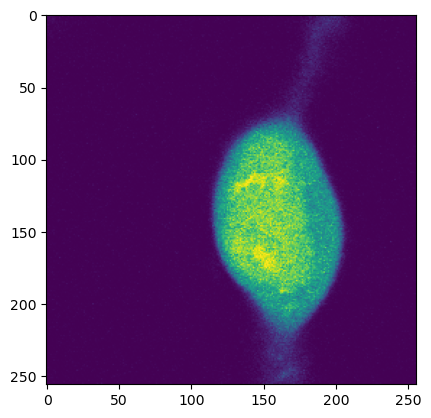

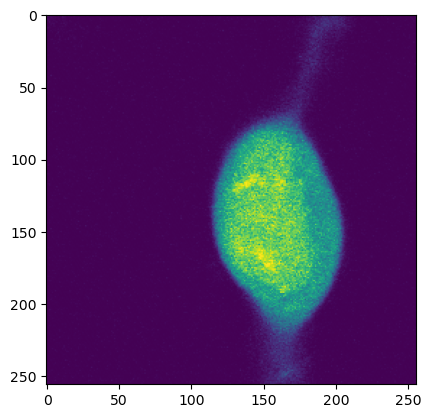

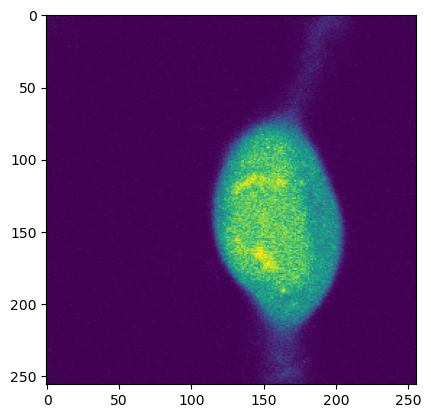

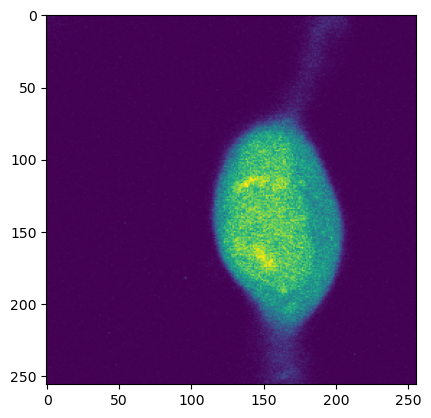

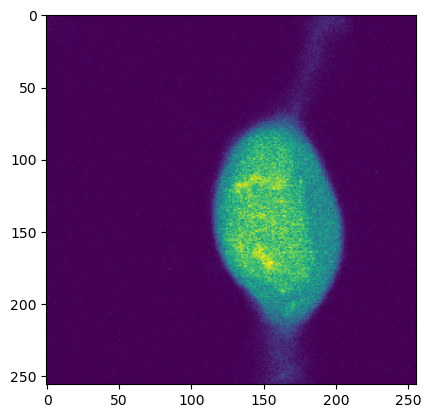

In [15]:
for single_frame in image_series:
    plt.imshow(single_frame)
    plt.show()

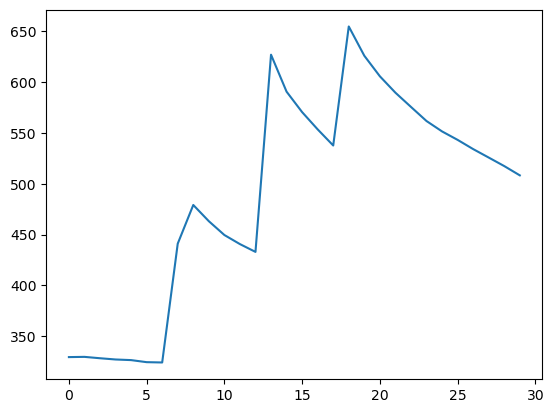

In [16]:
cytoplasm_int_profile=[]

for single_frame in image_series:
    masked_frame = ma.masked_where(~cytoplasm_mask, single_frame)
    frame_mean = np.mean(single_frame)
    cytoplasm_int_profile.append(frame_mean)

plt.plot(cytoplasm_int_profile)

In [17]:
cytoplasm_int_profile

[329.3238983154297,
 329.5577850341797,
 328.2046203613281,
 326.97998046875,
 326.3674621582031,
 324.34429931640625,
 324.0350646972656,
 440.9875946044922,
 479.05853271484375,
 463.09759521484375,
 449.4938049316406,
 440.5550231933594,
 432.8798828125,
 626.9836120605469,
 590.5995178222656,
 570.4522705078125,
 553.4681701660156,
 537.6024475097656,
 654.7591705322266,
 625.9474792480469,
 605.7333221435547,
 589.588623046875,
 575.5797424316406,
 561.6934356689453,
 551.4577178955078,
 543.1479034423828,
 534.0705108642578,
 525.7371368408203,
 517.347412109375,
 508.21592712402344]

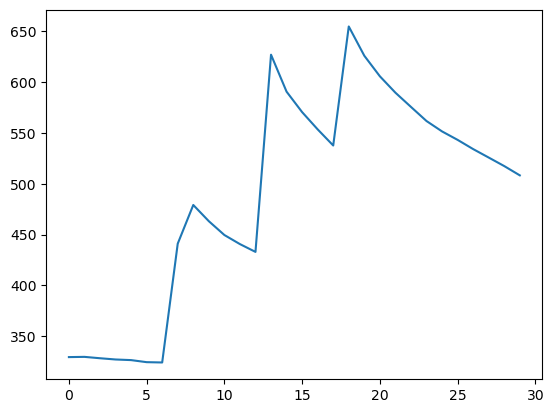

In [18]:
nucleus_int_profile=[]

for single_frame in image_series:
    masked_frame = ma.masked_where(~nucleus_mask, single_frame)
    frame_mean = np.mean(single_frame)
    nucleus_int_profile.append(frame_mean)

plt.plot(nucleus_int_profile)

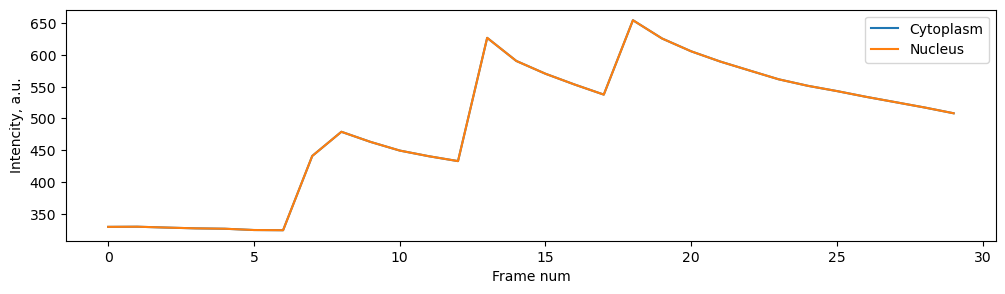

In [19]:
plt.figure(figsize=[12,3])
plt.plot(nucleus_int_profile, label='Cytoplasm')
plt.plot(cytoplasm_int_profile, label='Nucleus')

plt.xlabel('Frame num')
plt.ylabel('Intencity, a.u.')
plt.legend()

In [20]:
demo_arr= np.asarray(demo_list)

demo_list_new = [list_element + 1 for list_element in demo_list]

print(demo_list)
print(demo_list_new)

NameError: name 'demo_list' is not defined

In [21]:
cytoplasm_int_profile_new = [np.mean(ma.masked_where(~cytoplasm_mask,single_frame)) for single_frame in image_series]
cytoplasm_int_profile_new

[1081.5239852398524,
 1078.390897908979,
 1069.1913899138992,
 1058.7756457564576,
 1053.5052890528905,
 1042.9043050430505,
 1032.3729397293973,
 1671.838376383764,
 1772.2263222632225,
 1696.8728167281672,
 1625.1746617466174,
 1584.439852398524,
 1542.830750307503,
 2542.6757687576874,
 2330.992127921279,
 2216.109471094711,
 2123.1611316113163,
 2041.6469864698647,
 2776.7758917589176,
 2533.490036900369,
 2406.9950799507997,
 2312.322263222632,
 2238.3343173431736,
 2168.357195571956,
 2114.321279212792,
 2057.159409594096,
 2012.131857318573,
 1974.00024600246,
 1927.738991389914,
 1879.4324723247232]

In [22]:
nucleus_int_profile_new = [np.mean(ma.masked_where(~nucleus_mask,single_frame)) for single_frame in image_series]
nucleus_int_profile_new

[1407.1702407825433,
 1404.066591422122,
 1395.0682844243793,
 1388.319036869827,
 1390.4881489841987,
 1377.8438675696011,
 1376.5071482317533,
 2250.6420240782545,
 2625.0985703536494,
 2490.5882242287435,
 2388.106847253574,
 2309.856847253574,
 2258.621896162528,
 3751.9426260346127,
 3487.1288562829195,
 3335.3653122648607,
 3203.0447705041383,
 3082.52539503386,
 3881.6234010534235,
 3729.1875470278405,
 3593.9454477050413,
 3478.3615500376222,
 3376.349699021821,
 3275.75094055681,
 3192.637133182844,
 3140.1450338600453,
 3063.5675319789316,
 2999.232317531979,
 2939.3327689992475,
 2865.2637321294205]

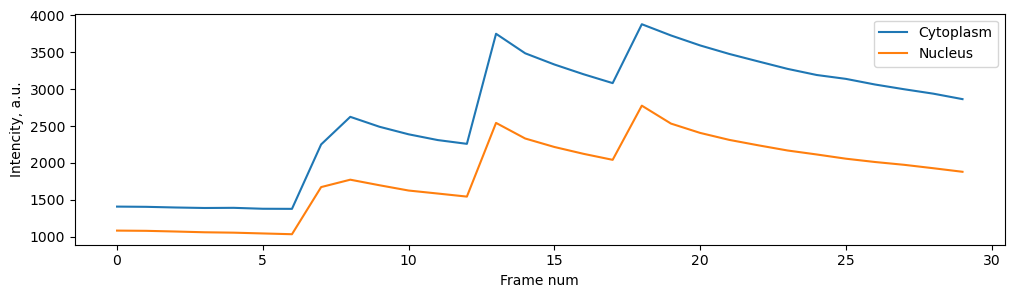

In [23]:
plt.figure(figsize=[12,3])
plt.plot(nucleus_int_profile_new, label='Cytoplasm')
plt.plot(cytoplasm_int_profile_new, label='Nucleus')

plt.xlabel('Frame num')
plt.ylabel('Intencity, a.u.')
plt.legend()

# Dictionary

In [24]:
import pandas as pd

In [25]:
frame_num_list= list(range(1, 31))

In [26]:
demo_dict = {1:'a', 'b':2}

In [27]:
demo_dict.keys()

dict_keys([1, 'b'])

In [28]:
demo_dict.values()

dict_values(['a', 2])

In [29]:
demo_for_df = {'frame_num':frame_num_list,
               'nucl_int':nucleus_int_profile_new,
               'cyto_int': cytoplasm_int_profile_new}

In [30]:
int_profiles_df = pd.DataFrame(demo_for_df)
int_profiles_df

frame_num     nucl_int     cyto_int
0           1  1407.170241  1081.523985
1           2  1404.066591  1078.390898
2           3  1395.068284  1069.191390
3           4  1388.319037  1058.775646
4           5  1390.488149  1053.505289
5           6  1377.843868  1042.904305
6           7  1376.507148  1032.372940
7           8  2250.642024  1671.838376
8           9  2625.098570  1772.226322
9          10  2490.588224  1696.872817
10         11  2388.106847  1625.174662
11         12  2309.856847  1584.439852
12         13  2258.621896  1542.830750
13         14  3751.942626  2542.675769
14         15  3487.128856  2330.992128
15         16  3335.365312  2216.109471
16         17  3203.044771  2123.161132
17         18  3082.525395  2041.646986
18         19  3881.623401  2776.775892
19         20  3729.187547  2533.490037
20         21  3593.945448  2406.995080
21         22  3478.361550  2312.322263
22         23  3376.349699  2238.334317
23         24  3275.750941  2168.357196
24         25  3192.637133  2114.321279
25         26  3140.145034  2057.159410
26         27  3063.567532  2012.131857
27         28  2999.232318  1974.000246
28         29  2939.332769  1927.738991
29         30  2865.263732  1879.432472

# Label

C:\Users\Sofi\anaconda3\lib\site-packages\paramiko\transport.py:219: CryptographyDeprecationWarning: Blowfish has been deprecated
  "class": algorithms.Blowfish,


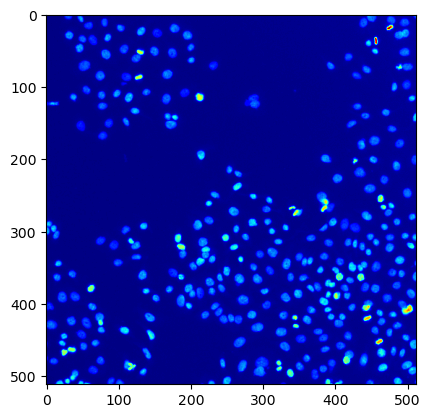

In [31]:
cells_image = skimage.data.human_mitosis()
plt.imshow(cells_image, cmap = 'jet')

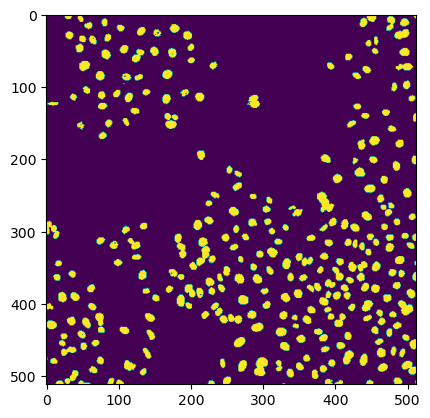

In [32]:
cells_mask = cells_image > skimage.filters.threshold_otsu(cells_image)
plt.imshow(cells_mask)

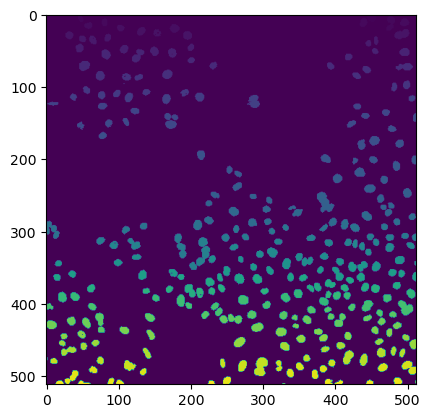

In [36]:
cells_labels = skimage.morphology.label(cells_mask)
plt.imshow(cells_labels)

In [34]:
a=np.ndarray.max(cells_labels)
a

293

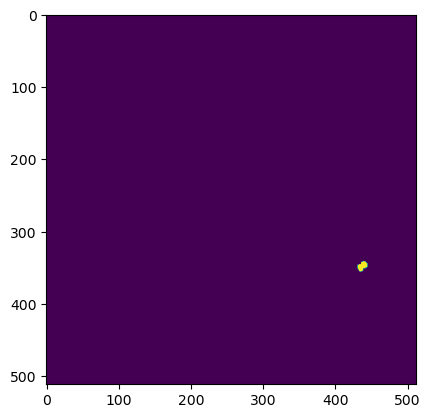

In [35]:
plt.imshow(cells_labels==153)